<a href="https://colab.research.google.com/github/franklinhamer2727/Apuntes-de-IA/blob/main/Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Arboles de Desición

###varibale Gini:

Es una variable que representa el porcentaje de respuestas similares
El metodo Gini utiliza esta formula 
$GINI = 1-(x/n)^2 -(y/n)^2$

- Su valor de Gini se encuentra entre 0 ( mismo resultado en las respuestas) y 0.5 ( respuestas completamente diferentes)
Donde
- x Esta el numero de respuestas positivas ('si')
- n es el numero de muestras 
- y es el numero de respuestas negativas('No')
por ejemplo
$$GINI : 1 -(7/13)^2 -(6/13)^2 = 0.497$$

In [2]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg


In [26]:
datos = pandas.read_csv('PlayTenni.csv')
datos

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [27]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [28]:
###Sustitucion de valores de texto por valores numericos
outlook = {'sunny':0,'overcast':1,'rainy':2}
humidity = {'high':0,'normal':1}
temp = {'hot':0,'mild':1,'cool':2}
play = {'no':0,'yes':1}
##Sustitucion
datos['outlook'] =datos['outlook'].map(outlook)
datos['humidity'] =datos['humidity'].map(humidity)
datos['temp'] =datos['temp'].map(temp)
datos['play'] =datos['play'].map(play)

In [30]:
caracteristicas = ['outlook','temp','humidity','play']
X = datos[caracteristicas]
Y = datos['windy']

In [ ]:
X

In [ ]:
Y

In [36]:
##instalacion de librerias para continuar con nuestro analisis
!pip install pydotplus
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


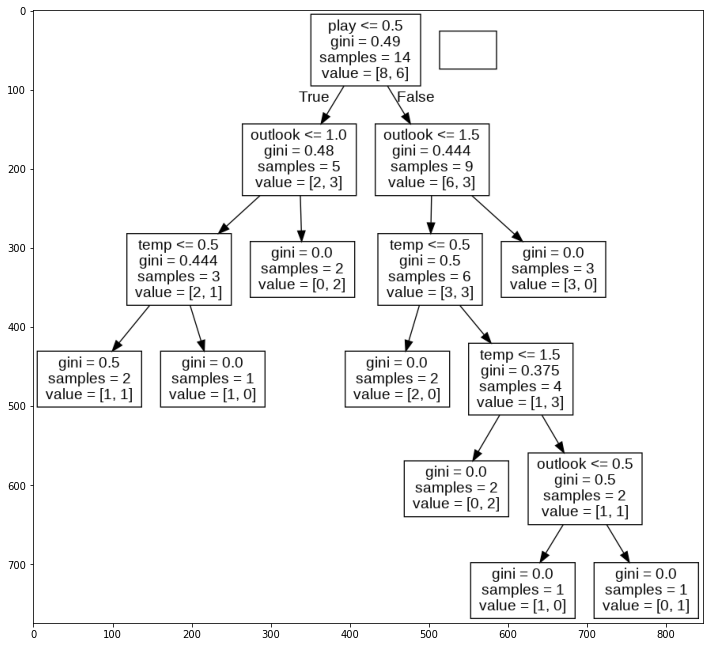

In [40]:
#Creacion del arbol de desicion
import pydotplus

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,Y)
datos = tree.export_graphviz(dtree,out_file =None,feature_names=caracteristicas)
graph = pydotplus.graph_from_dot_data(datos)
graph.write_png('/imagen.png')
imagen = pltimg.imread('/imagen.png')
plt.figure(figsize=(12,12))
imgplot = plt.imshow(imagen)
plt.show()


In [47]:
print(dtree.predict([[1,2,1,0]]))
print("[False] Significa SI")
print("[True] Significa NO")

[False]
[False] Significa SI
[True] Significa NO


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#Librerias de sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

In [72]:
data = pd.read_csv('predictive_maintenance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [74]:
#Cambiamos  de tipo object a numericos, ya que como object no podemos trabajar lo en python, y cambiamos el tipo 
#de datos ibs y Specie_Name para poder trabajar con esto datos mas adelante
#en el entrenamiento
from sklearn.preprocessing import LabelEncoder
data['Type'] = LabelEncoder().fit_transform(data['Type'])
data['Failure Type'] = LabelEncoder().fit_transform(data['Failure Type'])


###Limpiza de datos
**Notamos que tenemos varias variables como object: Type, Failure Type para python se trabajó con datos enteros, flotantes, por ello debemos modificar el tipo de información por la que sea fácil trabajar. Además, se tiene que la columna de productID, es única para cada producto, es por ello que no se puede normalizar a un solo valor, ya que se compone de letras y números**

*Las variables de tipo object( Tipo y Failure) se convierten de alfanuméricos a numéricas con el comando LabelEncoder().fit_transform() y nuevamente se muestran la información de la data para la visualización que todas las variables son de tipo numérico*



In [89]:


# Cambiamos de tipo object a  numérico, ya que como objet no podemos trabajarlo en python, y cambiamos
# el tipo de dato de obs y Species_Name para poder trabajar con estos datos más adelante en el entrenamiento


from sklearn.preprocessing import LabelEncoder
data['Type'] = LabelEncoder().fit_transform(data['Type']) 
data['Failure Type'] = LabelEncoder().fit_transform(data['Failure Type']) 

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  int64  
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 781.4+ KB




Se realiza un diagrama de torta que muestra el porcentaje de datos de cada tipos de variantes de calidad de los productos, variables que fueron transformadas de object a int64, donde:

$L = 1, M = 2, H = 0$


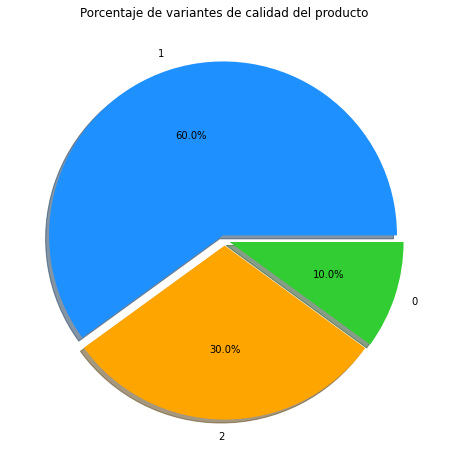

In [92]:
plt.figure(figsize = (8,8))

data['Type'].value_counts().plot.pie(explode = [0.03, 0.03, 0.03], colors = ['dodgerblue', 'orange', 'limegreen'], autopct = '%1.1f%%', shadow = True)
plt.xlabel(''),plt.ylabel('')
plt.title('Porcentaje de variantes de calidad del producto')
plt.show()

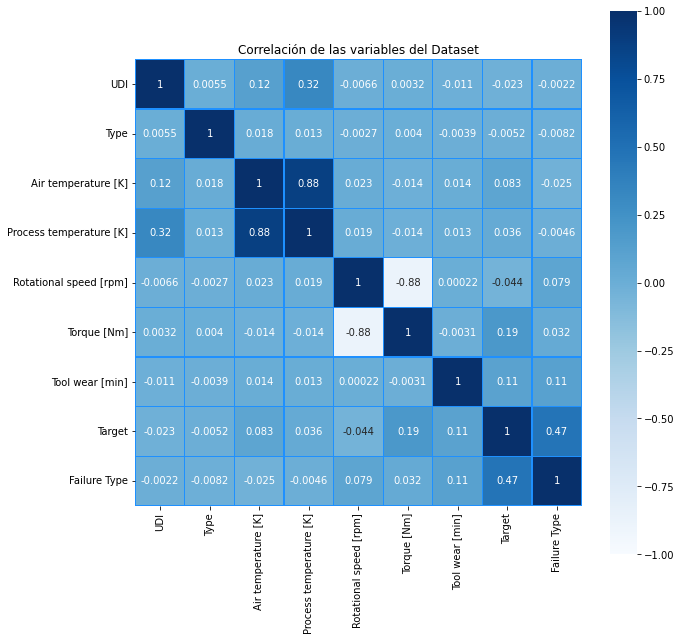

In [99]:


#visualizamos la tabla de correlación de todas las variables, pero cuesta visualizar el valor de correlación
#exacta, por ello utilizaremos más adelante otra matriz de correlación con dato exacto.

plt.figure(figsize=(10,10))

Correlacion = data.corr()
sns.heatmap(Correlacion, cmap = 'Blues', linewidths = 0.3, linecolor = 'dodgerblue', annot = True,
            vmin = -1, vmax = 1, cbar_kws = {'orientation':'vertical'}, square = True, cbar = True)
plt.title('Correlación de las variables del Dataset')
plt.show()



In [100]:
Correlacion

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,1.000000,0.005529,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,-0.002152
Type,0.005529,1.000000,0.017599,0.013444,-0.002693,0.004011,-0.003930,-0.005152,-0.008249
Air temperature [K],0.117428,0.017599,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,-0.025327
Process temperature [K],0.324428,0.013444,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,-0.004600
Rotational speed [rpm],-0.006615,-0.002693,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.079407
Torque [Nm],0.003207,0.004011,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,0.031737
Tool wear [min],-0.010702,-0.003930,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.111619
Target,-0.022892,-0.005152,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.470541
Failure Type,-0.002152,-0.008249,-0.025327,-0.004600,0.079407,0.031737,0.111619,0.470541,1.000000


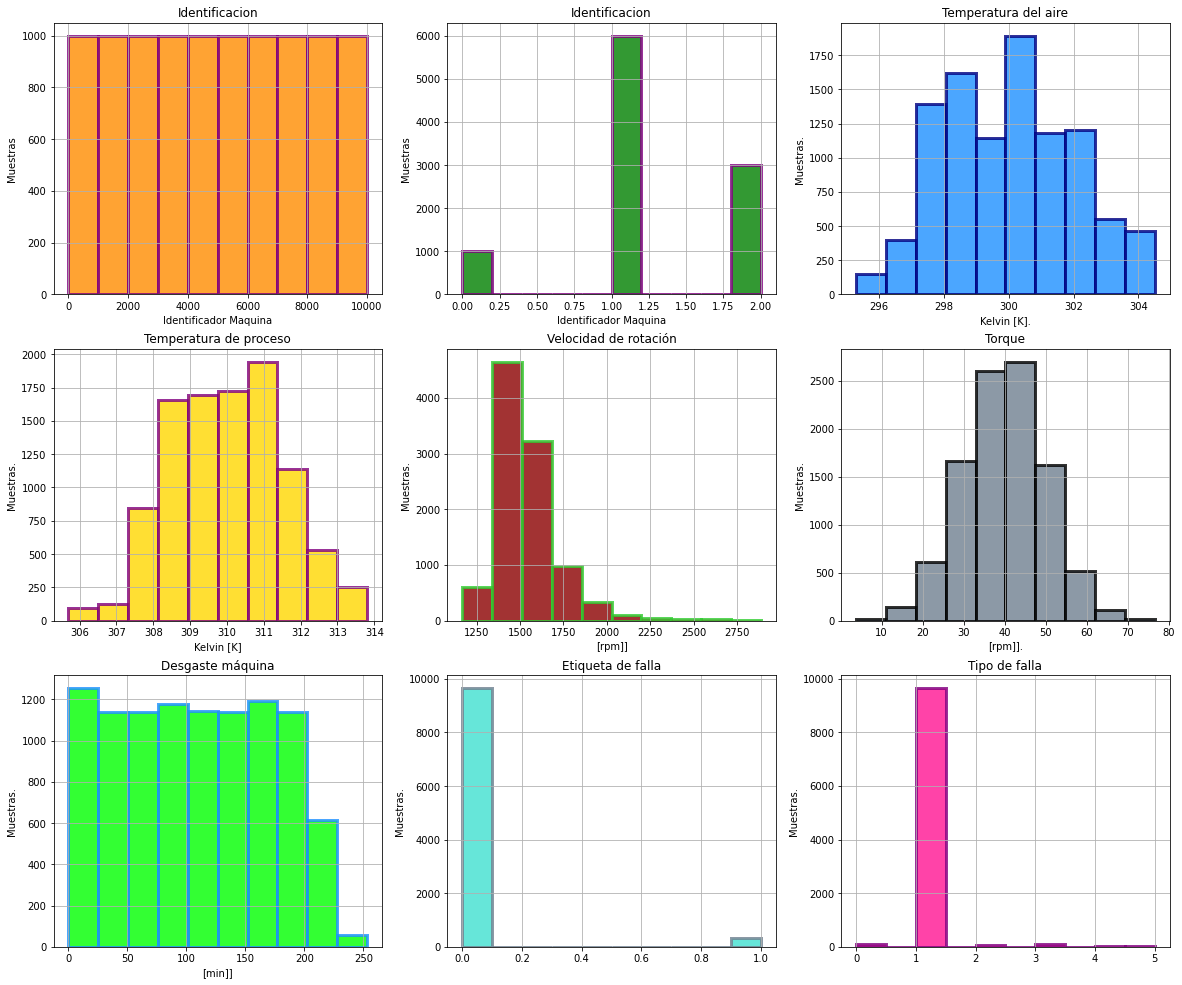

In [108]:
plt.figure(figsize=(20,17))
plt.subplot(331)
plt.hist(data['UDI'],color="darkorange",edgecolor='purple',alpha=0.8,linewidth=3)
plt.title('Identificacion')
plt.xlabel('Identificador Maquina')
plt.ylabel('Muestras')
plt.grid()

plt.subplot(332)
plt.hist(data['Type'],color="green",edgecolor='purple',alpha=0.8,linewidth=3)
plt.title('Identificacion')
plt.xlabel('Identificador Maquina')
plt.ylabel('Muestras')
plt.grid()


plt.subplot(333)
plt.hist(data["Air temperature [K]"], color = "dodgerblue", edgecolor = 'navy', alpha = 0.8, linewidth = 3)
plt.title('Temperatura del aire')
plt.xlabel('Kelvin [K].')
plt.ylabel('Muestras.')
plt.grid()



plt.subplot(334)
plt.hist(data["Process temperature [K]"], color = "gold", edgecolor = 'purple', alpha = 0.8, linewidth = 3)
plt.title('Temperatura de proceso'), plt.xlabel('Kelvin [K]'), plt.ylabel('Muestras.'), plt.grid()

plt.subplot(335)
plt.hist(data["Rotational speed [rpm]"], color = "darkred", edgecolor = 'limegreen', alpha = 0.8, linewidth = 3)
plt.title('Velocidad de rotación'), plt.xlabel('[rpm]]'), plt.ylabel('Muestras.'), plt.grid()

plt.subplot(336)
plt.hist(data["Torque [Nm]"], color = "slategrey", edgecolor = 'black', alpha = 0.8, linewidth = 3)
plt.title('Torque'), plt.xlabel('[rpm]].'), plt.ylabel('Muestras.'), plt.grid()

plt.subplot(337)
plt.hist(data["Tool wear [min]"], color = "lime", edgecolor = 'dodgerblue', alpha = 0.8, linewidth = 3)
plt.title('Desgaste máquina'), plt.xlabel('[min]]'), plt.ylabel('Muestras.'), plt.grid()

plt.subplot(338)
plt.hist(data["Target"], color = "turquoise", edgecolor = 'slategray', alpha = 0.8, linewidth = 3)
plt.title('Etiqueta de falla'), plt.xlabel(''), plt.ylabel('Muestras.'), plt.grid()

plt.subplot(339)
plt.hist(data["Failure Type"], color = "deeppink", edgecolor = 'purple', alpha = 0.8, linewidth = 3)
plt.title('Tipo de falla'), plt.xlabel(''), plt.ylabel('Muestras.'), plt.grid()

plt.show()

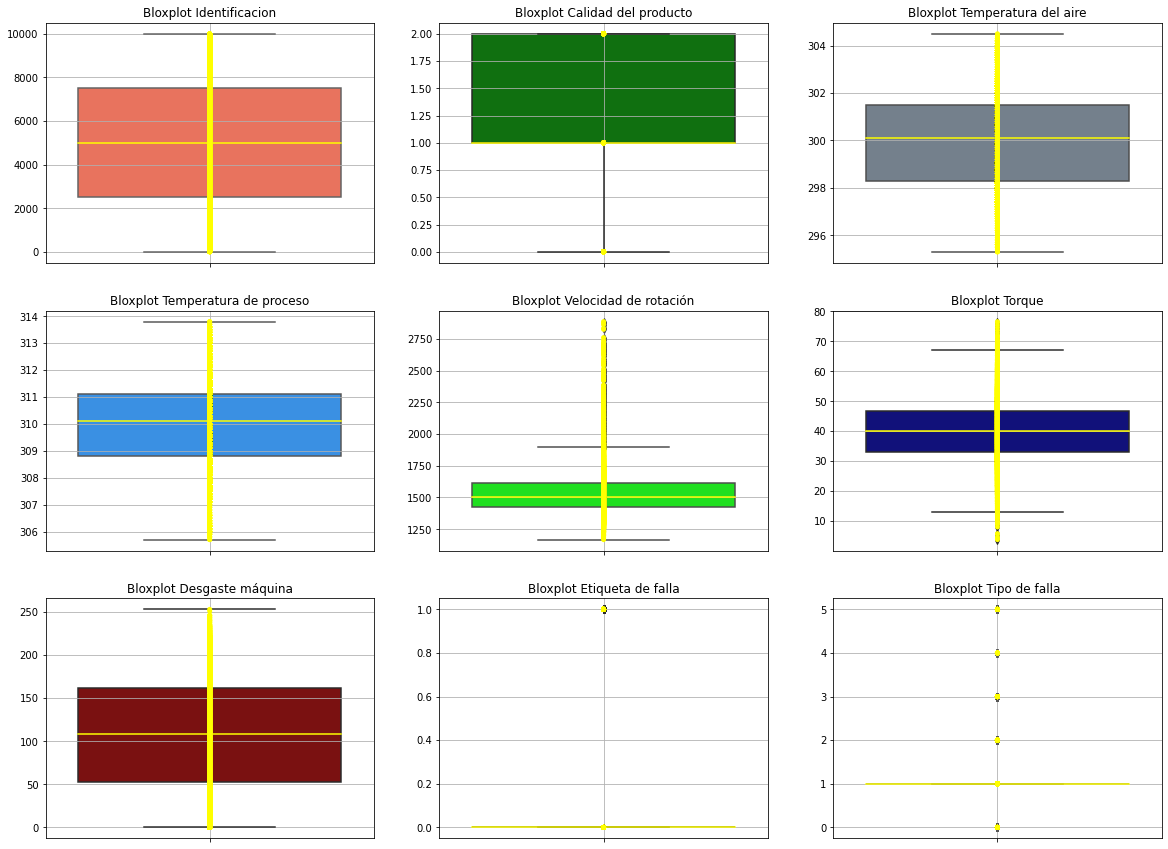

In [118]:
###Busqueda de outliers
plt.figure(figsize=(20,15))

plt.subplot(331)
sns.boxplot(y=data['UDI'],color = 'tomato', medianprops = dict(color = "yellow"))
sns.stripplot(y=data['UDI'],jitter=False, color='yellow',edgecolor='gray')
plt.title('Bloxplot Identificacion')
plt.ylabel('')
plt.grid()

plt.subplot(332), sns.boxplot(y = data["Type"], color = 'green', medianprops = dict(color = "yellow"))
sns.stripplot(y = data["Type"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Calidad del producto'), plt.ylabel('')
plt.grid()

plt.subplot(333), sns.boxplot(y=data["Air temperature [K]"], color = 'slategrey', medianprops = dict(color = "yellow"))
sns.stripplot(y = data["Air temperature [K]"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Temperatura del aire'), plt.ylabel('')
plt.grid()

plt.subplot(334), sns.boxplot(y=data["Process temperature [K]"], color = 'dodgerblue', medianprops = dict(color = "yellow"))
sns.stripplot(y = data["Process temperature [K]"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Temperatura de proceso'), plt.ylabel('')
plt.grid()

plt.subplot(335), sns.boxplot(y=data["Rotational speed [rpm]"], color = 'lime', medianprops = dict(color = "yellow"))
sns.stripplot(y = data["Rotational speed [rpm]"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Velocidad de rotación'), plt.ylabel('')
plt.grid()

plt.subplot(336), sns.boxplot(y=data["Torque [Nm]"], color = 'darkblue', medianprops = dict(color = "yellow"))
sns.stripplot(y = data["Torque [Nm]"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Torque'), plt.ylabel('')
plt.grid()

plt.subplot(337), sns.boxplot(y=data["Tool wear [min]"], color = 'darkred', medianprops = dict(color = "yellow"))
sns.stripplot(y = data["Tool wear [min]"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Desgaste máquina'), plt.ylabel('')
plt.grid()

plt.subplot(338), sns.boxplot(y=data["Target"], color = 'darkmagenta', medianprops = dict(color = "yellow"));
sns.stripplot(y = data["Target"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Etiqueta de falla'), plt.ylabel('')
plt.grid()

plt.subplot(339), sns.boxplot(y=data["Failure Type"], color = 'turquoise', medianprops = dict(color = "yellow"));
sns.stripplot(y = data["Failure Type"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Tipo de falla'), plt.ylabel('')
plt.grid()

plt.show()

###Algoritmo
####Redes Neuronales

**Algoritmos de clasificación: Se utiliza para entrenar un modelo con el fin de predecir el resultado de una variable de salida. Para el data set, se predice si la máquina fallará o no ( clasificación binaria)**

*Los algoritmos de redes neuronales son inspirados por el proceso de aprendizaje que se produce en el cerebro humano. Consiste en una red de neuronas (parámetros) que  permiten el algoritmo aprender y mejorar analizando datos. Las capas neuronales producen una salida a partir de una o varias entradas, enviando señales de capa en capa hasta la última, la cual entregara el resultado final del modelo*




## **Modelo: Desde la librería keras.models se crea un Modelo Secuencial.**

Tipos de capas: Se importan varios tipos de capas con el comando keras.layers.


In [120]:
from keras.models import Sequential

#Tipos de capas
from keras.layers import Dense, Activation,Dropout
from keras.layers import Convolution2D, MaxPool2D, Reshape, BatchNormalization,Flatten
from keras.losses import sparse_categorical_crossentropy

Se define como varibales predictoras toda la columnas menos el target, que es a variable a predecir y contiene la informacion de su falla la maquina o no


In [121]:
X_data = data[['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type']]
Y_data = data['Target']

Se define los conjuntos de entrenamiento (20%)y test (80%).Tambien  se normalizan las varibales predictoras de entrenamiento y test en un valor entre 0 y 1 con el comando `scaler.fit_transform`

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data, test_size=.8)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
Y_test = scaler.transform(X_test)

se crea el modelo secuencial y se añade capas de neuronas


In [126]:


model = Sequential()
# Capas de Neuronas.

# Capa densa con 50 neuronas y 8 variables de entrada.
model.add(Dense(50, input_dim = 8, kernel_initializer='uniform', activation='relu'))

# Capa para evitar que los pesos crezcan y exista sobreentrenamiento.
model.add(Dropout(0.5))

# Capa densa con 500 neuronas y 500 variables de entrada.
model.add(Dense(500, input_dim = 500, kernel_initializer='uniform', activation='relu'))

# Capa para evitar que los pesos crezcan y exista sobreentrenamiento.
model.add(Dropout(0.5))

# Capa densa con 2 neuronas.
model.add(Dense(2, kernel_initializer='uniform', activation='sigmoid'))



Se define una funcion de perdida, tipo de optimizador y metrca de desempeño, que calcula la frecuencia de con la que la prediccion coincide con el dataset real

In [127]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [128]:


model.fit(X_train, Y_train, batch_size=30, epochs=100)



Epoch 1/100
67/67 [==============================] - 1s 4ms/step - loss: 0.2837 - accuracy: 0.9580
Epoch 2/100
67/67 [==============================] - 0s 4ms/step - loss: 0.1549 - accuracy: 0.9670
Epoch 3/100
67/67 [==============================] - 0s 4ms/step - loss: 0.1463 - accuracy: 0.9670
Epoch 4/100
67/67 [==============================] - 0s 4ms/step - loss: 0.1376 - accuracy: 0.9670
Epoch 5/100
67/67 [==============================] - 0s 5ms/step - loss: 0.1312 - accuracy: 0.9670
Epoch 6/100
67/67 [==============================] - 0s 4ms/step - loss: 0.1249 - accuracy: 0.9670
Epoch 7/100
67/67 [==============================] - 0s 4ms/step - loss: 0.1178 - accuracy: 0.9675
Epoch 8/100
67/67 [==============================] - 0s 5ms/step - loss: 0.1164 - accuracy: 0.9690
Epoch 9/100
67/67 [==============================] - 0s 4ms/step - loss: 0.1061 - accuracy: 0.9725
Epoch 10/100
67/67 [==============================] - 0s 4ms/step - loss: 0.1057 - accuracy: 0.9705
Epoch 11/

In [129]:
scores = model.evaluate(X_train, Y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

63/63 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9955
accuracy: 99.55%
